Se importan las librerias asociadas a tensorflow y keras

In [0]:
import tensorflow as tf
import numpy as np
import keras 
from keras.datasets import boston_housing
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from keras import backend as K
#from keras.calbacks import TensorBoard
from keras.optimizers import SGD, Adam
from keras.applications import VGG16
import matplotlib.pylab as plt

In [0]:
batch_size = 10
epochs = 50

In [3]:
(xt, yt), (xtest, ytest) = boston_housing.load_data()

mean = xt.mean(axis = 0)
xt -= mean
std = xt.std(axis = 0)
xt /= std
print(xt.shape[1])
xtest -= mean
xtest /= std

maximo = np.max(yt)
yt = yt/(maximo)
ytest = ytest/maximo

13


In [0]:
Entradas = Input(shape = (13,))
x = Dense(64,activation='relu')(Entradas)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='linear')(x)

In [5]:
modelo = Model(inputs = Entradas, outputs = x)
#modelo.summary()
Adam = Adam(lr = 0.001, beta_1 = 0.90, beta_2= 0.9) 
#SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesteroy = True)
modelo.compile(loss = keras.losses.mse, optimizer = Adam, metrics = ['mse'])
history = modelo.fit(xt, yt, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (xtest, ytest))
puntuacion = modelo.evaluate(xtest, ytest, verbose = 0)





Train on 404 samples, validate on 102 samples
Epoch 1/50





404/404 [==============================] - 2s 4ms/step - loss: 0.1966 - mean_squared_error: 0.1966 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 2/50
404/404 [==============================] - 0s 438us/step - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 3/50
404/404 [==============================] - 0s 406us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 4/50
404/404 [==============================] - 0s 348us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5/50
404/404 [==============================] - 0s 370us/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6/50
404/404 [==============================] - 0s 393us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0

In [6]:
print(puntuacion)

[0.0061206648162766995, 0.0061206648162766995]


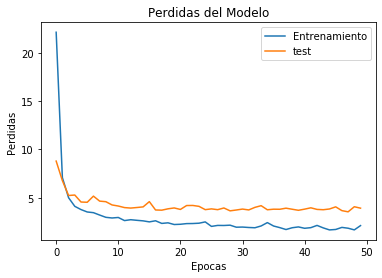

In [7]:
plt.figure(1) 
plt.plot(np.sqrt(history.history['loss'])*maximo)
plt.plot(np.sqrt(history.history['val_loss'])*maximo)
plt.title('Perdidas del Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento','test'],loc = 'upper right')
plt.show()